**Question 1**

In [ ]:
import numpy as np
import networkx as nx

# Use networkx.DiGraph to get the transition matrix
# or you can create it directly. For nodes having
# no outgoing links, e.g. node 1, set each element
# equal to 1/N on the corresponding columns.
DG = nx.DiGraph()
DG.add_nodes_from(np.arange(1, 12))
DG.add_edges_from([(i, 2) for i in range(3, 10)])
DG.add_edges_from([(i, 5) for i in range(6, 12)])
DG.add_edges_from([(4, 1), (2, 3), (5, 4), (5, 6)])
M = nx.google_matrix(DG, alpha=1).T

d = 0.95
N = M.shape[0]
P = np.ones(N) / N

# Iterative method for PageRank
while True:
  new_P = (1 - d) / N + d * M @ P
  err = np.linalg.norm(new_P - P)
  P = new_P
  if err <= 1e-4:
    break
print(P)

[0.01322215 0.45575883 0.43872411 0.01586271 0.03213265 0.01586271
 0.00568737 0.00568737 0.00568737 0.00568737 0.00568737]


**Question 2**

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.cluster import KMeans

# Load mnist dataset, only use train dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = x_train.reshape([len(x_train), -1]).astype(float)

# Initialized the centroids for K-means++
def initialize(data, k, seed=0):
  # set random seed
  np.random.seed(seed)

  # initialize the centroids and set a random data point
  centroids = np.zeros([k, data.shape[1]])
  centroids[0] = data[np.random.randint(data.shape[0])]

  # in order to reduce the calculation
  x2 = np.sum(data**2, axis=1).reshape(-1, 1)

  # compute remaining k - 1 centroids
  for num_c in range(1, k):
    # get distance between data and the nearest centroid
    y2 = np.sum(centroids[:num_c]**2, axis=1)
    xy = np.matmul(data, centroids[:num_c].T)
    dists = x2 - 2*xy + y2
    dists = np.min(dists, axis=1)

    # randomly choose a new centroid according to dists
    idx = np.random.choice(len(data), p=dists/np.sum(dists))
    centroids[num_c] = data[idx]

  return centroids

In [ ]:
# K-means with random initialized centroids
kmeans_1 = KMeans(n_clusters=10, random_state=0, init='random', n_init=1).fit(X)
# K-means++
kmeans_2 = KMeans(n_clusters=10, random_state=0, init=initialize(X, 10, seed=0), n_init=1).fit(X)

In [ ]:
def ARI(pred, true, k):
  # compute the contingency table
  N = np.zeros([k, k])
  for i in range(k):
    for j in range(k):
      N[i, j] = np.sum((pred==i) & (true==j))

  # compute sum of C(a_i, 2)
  QA = np.sum([a * (a - 1) / 2 for a in np.sum(N, axis=1)])
  # compute sum of C(b_i, 2)
  QB = np.sum([b * (b - 1) / 2 for b in np.sum(N, axis=0)])

  E = QA * QB / (len(pred) * (len(pred) - 1) / 2)
  return (np.sum(N * (N - 1) / 2) - E) / ((QA + QB) / 2 - E)

In [ ]:
print('K-means   ARI:', ARI(y_train, kmeans_1.labels_, 10))
print('K-means++ ARI:', ARI(y_train, kmeans_2.labels_, 10))

K-means   ARI: 0.39250564006871097
K-means++ ARI: 0.4055192810018077


**Question 3**

(a). For two $d\times n$ matrices $A$ and $B$, the Frobenius inner product is defined as $⟨A,B⟩_F=\sum_{k=1}^d\sum_{l=1}^nA_{k,l}B_{k,l}$.

We have $||A||_F^2=⟨A,A⟩_F$ and $⟨\mathbf{U}_i \mathbf{V}_i^T,\mathbf{U}_j \mathbf{V}_j^T⟩_F=⟨\mathbf{U}_i,\mathbf{U}_j⟩⟨\mathbf{V}_i,\mathbf{V}_j⟩$ which is equal to 1 if $i=j$, and 0 otherwise.

$||X-\sum_{i=1}^3\sigma_i \mathbf{U}_i \mathbf{V}_i^T||_F^2
=⟨\sum_{i=4}^d\sigma_i \mathbf{U}_i \mathbf{V}_i^T,\sum_{i=4}^d\sigma_i \mathbf{U}_i \mathbf{V}_i^T⟩_F
=\sum_{i=4}^d\sum_{j=4}^d\sigma_i\sigma_j⟨\mathbf{U}_i \mathbf{V}_i^T,\mathbf{U}_j \mathbf{V}_j^T⟩_F=\sum_{i=4}^d\sigma_i^2$.

(b).

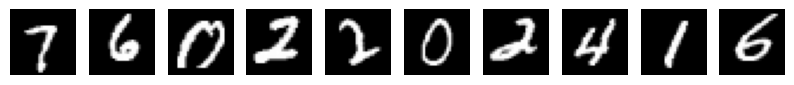

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly sample 1000 images
images = x_train[np.random.randint(len(x_train), size=1000)]

# Randomly show 10 images
index = np.random.randint(len(images), size=10)
plt.figure(figsize=(10, 1))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(images[index[i]], cmap='gray')
  plt.axis('off')
plt.show()

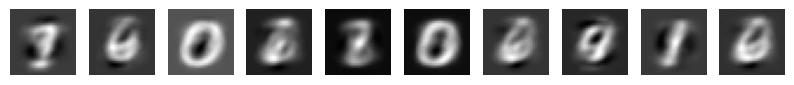

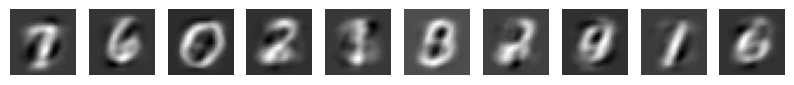

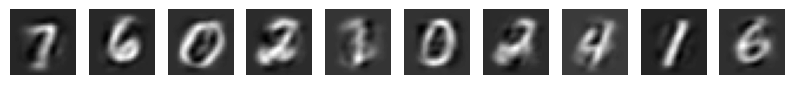

In [ ]:
X = images.reshape([len(images), -1]).T
U, S, VT = np.linalg.svd(X)
for k in [5, 10, 20]:
  X_bar = U[:, :k] @ (S[:k] * VT[:k].T).T
  plt.figure(figsize=(10, 1))
  for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_bar[:, index[i]].reshape([28, 28]), cmap='gray')
    plt.axis('off')
  plt.show()